<a href="https://colab.research.google.com/github/mqquiroz/ICV411/blob/main/Example_Direct_Step.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GVD example Direct Step (Moglen 6.1)

[Video Youtube](https://www.youtube.com/watch?v=L5oBguZC_2c)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve,newton

In [3]:
#Manning dor a trapezoidal or rectangular channel
def manning(y,Q,b,S,n,Co,m):
  A = (b+m*y)*y
  R = A/(b+2*y*(1+m**2)**(1/2))
  return Q-(Co/n)*A*R**(2/3)*S**(1/2)

#Critical flow depth
def critT(y):
  A = (b+m*y)*y
  B = b+2*m*y
  return Q/np.sqrt(g*A**3/B)-1

In [4]:
#Conditions for the M2 profile using channel properties from example 6.1

g = 9.81
Q = 30
b = 10
n = 0.03
m = 0
So = 0.0050
x0 = 0 #Starting point

if g>10:
  Co = 1.486
else:
  Co = 1

#Specify depth (crit and normal)
yc = newton(critT,0.2)
yo = fsolve(manning,1,args=(Q,b,So,n,Co,m))
print('Critical depth',np.around(yc,decimals=3))
print('Normal depth',np.around(yo,decimals=3))

Critical depth 0.972
Normal depth [1.265]


In [5]:
#Specify depths
yd = yc #downstream
yu = np.around(yo,decimals=6) #upstream
yu = 1.2619 #needed to match Moglen

In [6]:
#Calculate profile [small number if points]

N = 8 #number of calculation points
y = np.array([yd,1,1.05,1.1,1.15,1.2,1.25,yu])

#N = 100
#y =np.linspace(yd,yu,N)

dx = np.zeros(N-1)
x = np.zeros(N)

A = (b+m*y)*y
R = A/(b+2*y*(1+m**2)**(1/2))
Sf = (Q*n/(Co*A*R**(2/3)))**2
E = y+Q**2/(2*g*A**2)

dx = (E[1:]-E[:-1])/(So-0.5*(Sf[1:]+Sf[:-1]))
x[0] = x0
x[1:] = dx
x = np.cumsum(x)

In [7]:
print(np.around(x,decimals=2))

[   0.     -0.2    -1.8    -5.78  -13.87  -30.72  -77.92 -136.11]


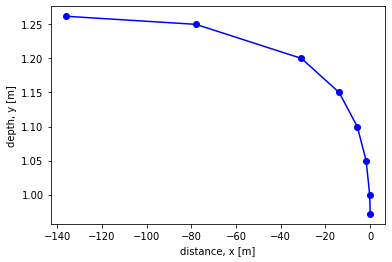

distance to the upstream bc = -136.11


In [9]:
plt.plot(x,y,linestyle='-',marker='o',color='b')
plt.ylabel('depth, y [m]')
plt.xlabel('distance, x [m]')
plt.show()
print('distance to the upstream bc =', np.around(x[N-1],decimals=2))

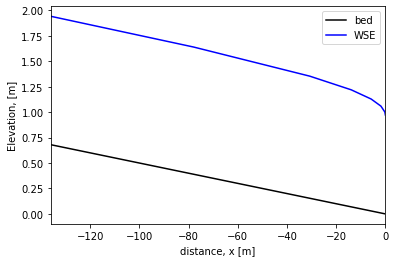

distance to theupstream bc = -136.11


In [10]:
eta = -x*So
WSE = eta+y

plt.plot(x,eta,'k-',label='bed')
plt.plot(x,WSE, linestyle='-',color='b',label='WSE')
plt.legend()
plt.ylabel('Elevation, [m]')
plt.xlabel('distance, x [m]')
plt.xlim(x[N-1],x[0])
plt.show()
print('distance to theupstream bc =',np.around(x[N-1],decimals=2))